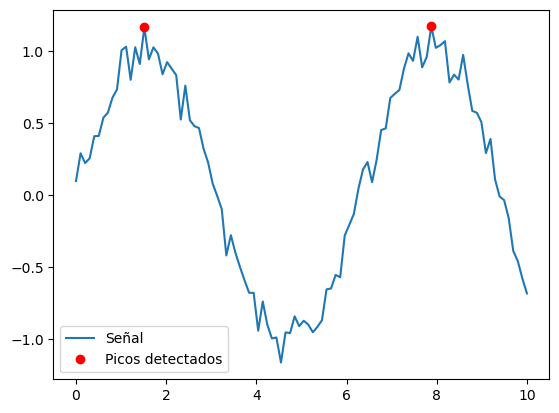

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Crear datos de ejemplo
x = np.linspace(0, 10, 100)
data = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# Detectar picos con diferentes condiciones
peaks, properties = find_peaks(data, height=0.5, prominence=0.3, distance=5)

# Graficar la señal y los picos detectados
plt.plot(x, data, label="Señal")
plt.plot(x[peaks], data[peaks], "ro", label="Picos detectados")
plt.legend()
plt.show()


In [3]:
data2 =[1, 2, 3, 4, 5, 6,2,1,2,3,4,5,6,7,1,2,4]

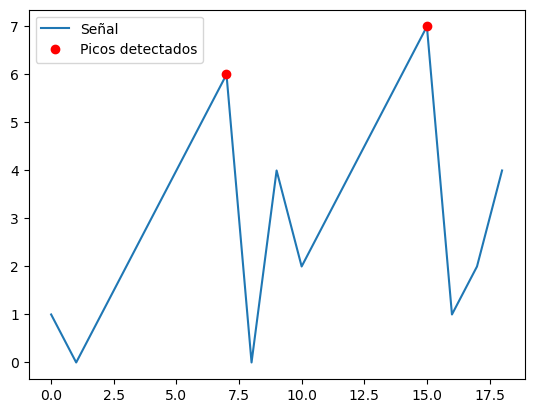

In [4]:

# Datos
data2 = [1,0,1, 2, 3, 4, 5, 6, 0, 4, 2, 3, 4, 5, 6, 7, 1, 2, 4]

# Crear el eje X
x = np.arange(len(data2))

# Detectar picos
peaks, properties = find_peaks(data2, height=3.5, prominence=6, distance=2)

#distance, distancia minima entre un pico y el siguiente
#height, altura minima del pico


# Graficar la señal y los picos detectados
plt.plot(x, data2, label="Señal")
plt.plot(x[peaks], np.array(data2)[peaks], "ro", label="Picos detectados")  # Corregido
plt.legend()
plt.show()

In [ ]:
print(x[peaks])

[ 7 15]


In [8]:
import pandas as pd

In [9]:
# Ruta del archivo Excel (corrigiendo las barras)
archivo_excel = r"C:\Users\hzubi\OneDrive\Escritorio\airbus\leer_plot\random_updown_data_text.xlsx"

df = pd.read_excel(archivo_excel, dtype=str)

# Verificar los tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RandomNumber   120 non-null    object
 1   UpDown         120 non-null    object
 2   UpDownPlus100  120 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB
None


In [11]:
# Ruta del archivo Excel (corrigiendo las barras)
archivo_excel = r"C:\Users\hzubi\OneDrive\Escritorio\airbus\contar picos\Libro1_updated.xlsx"

# Cargar el archivo en un DataFrame
df = pd.read_excel(archivo_excel)

# Mostrar las primeras filas
df.head()


,id_ciclo,tiempo,sens_vacio1,sens_vacio2,sens_vacio3,sens_vacio4,sens_presion,sens_presion2
0,id_ciclo1,09:00:00,8,8,15,NaN,0.000000,1.000000
1,id_ciclo1,09:00:30,8,8,20,NaN,6.666667,5.666667
2,id_ciclo1,09:01:00,8,8,25,NaN,13.333333,14.333333
3,id_ciclo1,09:01:30,8,8,10,NaN,20.000000,21.000000
4,id_ciclo1,09:02:00,8,8,5,NaN,26.666667,27.666667


In [12]:
# Convertir la columna "tiempo" a formato datetime
df["tiempo"] = pd.to_datetime(df["tiempo"], format="%H:%M:%S")

df.head()  # Para ver los primeros datos

,id_ciclo,tiempo,sens_vacio1,sens_vacio2,sens_vacio3,sens_vacio4,sens_presion,sens_presion2
0,id_ciclo1,1900-01-01 09:00:00,8,8,15,NaN,0.000000,1.000000
1,id_ciclo1,1900-01-01 09:00:30,8,8,20,NaN,6.666667,5.666667
2,id_ciclo1,1900-01-01 09:01:00,8,8,25,NaN,13.333333,14.333333
3,id_ciclo1,1900-01-01 09:01:30,8,8,10,NaN,20.000000,21.000000
4,id_ciclo1,1900-01-01 09:02:00,8,8,5,NaN,26.666667,27.666667


In [13]:
# Listas para almacenar los ciclos que cumplen o no la condición
ciclos_cumplen = []
ciclos_no_cumplen = []

# Iterar sobre cada ciclo único
for ciclo in df["id_ciclo"].unique():
    df_ciclo = df[df["id_ciclo"] == ciclo]  # Filtrar solo las filas de ese ciclo

    # Buscar la primera vez que sens_presion o sens_presion2 alcanzan 20 o más
    fila_presion1_20 = df_ciclo[df_ciclo["sens_presion"] >= 20].head(1)
    fila_presion2_20 = df_ciclo[df_ciclo["sens_presion2"] >= 20].head(1)

    # Determinar cuál de las dos columnas alcanzó 20 primero
    if not fila_presion1_20.empty or not fila_presion2_20.empty:
        # Obtener el tiempo de referencia (el más temprano entre las dos columnas)
        tiempo_referencia = min(
            fila_presion1_20["tiempo"].values[0] if not fila_presion1_20.empty else pd.Timestamp.max,
            fila_presion2_20["tiempo"].values[0] if not fila_presion2_20.empty else pd.Timestamp.max
        )

        # Filtrar datos en los siguientes 10 minutos (600 segundos)
        df_posteriores = df_ciclo[df_ciclo["tiempo"] >= tiempo_referencia]
        df_posteriores = df_posteriores[df_posteriores["tiempo"] <= tiempo_referencia + pd.Timedelta(minutes=10)]

        # Comprobar si hay al menos 20 filas en ese rango
        if len(df_posteriores) >= 20:
            ciclos_cumplen.append(ciclo)
        else:
            ciclos_no_cumplen.append(ciclo)

# Verificar los ciclos que cumplen
print(f"Ciclos que cumplen la condición: {ciclos_cumplen}")

Ciclos que cumplen la condición: ['id_ciclo1', 'id_ciclo2', 'id_ciclo3']


In [14]:
# Crear un nuevo DataFrame filtrando las filas desde que "ens_presion" o "ns_presion2" >= 20 por cada id_ciclo
df_cumplen_filtrado = pd.DataFrame()

# Iterar sobre cada ciclo que cumple la condición
for ciclo in ciclos_cumplen:
    df_ciclo = df[df["id_ciclo"] == ciclo]  # Filtrar solo el ciclo actual
    
    # Buscar la primera fila donde ens_presion o ns_presion2 alcanzan o superan 20
    fila_presion1_20 = df_ciclo[df_ciclo["sens_presion"] >= 20].head(1)
    fila_presion2_20 = df_ciclo[df_ciclo["sens_presion2"] >= 20].head(1)

    # Determinar cuál de las dos columnas alcanzó 20 primero
    if not fila_presion1_20.empty or not fila_presion2_20.empty:
        # Obtener el tiempo de referencia (el más temprano entre las dos columnas)
        tiempo_referencia = min(
            fila_presion1_20["tiempo"].values[0] if not fila_presion1_20.empty else pd.Timestamp.max,
            fila_presion2_20["tiempo"].values[0] if not fila_presion2_20.empty else pd.Timestamp.max
        )

        # Filtrar solo las filas desde que se alcanza 20 en adelante
        df_ciclo_filtrado = df_ciclo[df_ciclo["tiempo"] >= tiempo_referencia]
        
        # Agregar al nuevo DataFrame
        df_cumplen_filtrado = pd.concat([df_cumplen_filtrado, df_ciclo_filtrado], ignore_index=True)

# Guardar el nuevo DataFrame en un archivo CSV para referencia
df_cumplen_filtrado.to_csv("ciclos_cumplen_filtrado.csv", index=False)

# Mostrar las primeras filas para verificar
df_cumplen_filtrado.head(5)



,id_ciclo,tiempo,sens_vacio1,sens_vacio2,sens_vacio3,sens_vacio4,sens_presion,sens_presion2
0,id_ciclo1,1900-01-01 09:01:30,8,8,10,NaN,20.000000,21.000000
1,id_ciclo1,1900-01-01 09:02:00,8,8,5,NaN,26.666667,27.666667
2,id_ciclo1,1900-01-01 09:02:30,8,8,0,NaN,33.333333,32.333333
3,id_ciclo1,1900-01-01 09:03:00,8,8,15,NaN,15.000000,14.000000
4,id_ciclo1,1900-01-01 09:03:30,8,8,20,NaN,46.666667,47.666667


In [15]:
# Crear un DataFrame para almacenar las medias por cada id_ciclo y cada sensor_vacio
medias_sensores_vacio = []

# Iterar sobre cada ciclo único en df_cumplen_filtrado
for ciclo in df_cumplen_filtrado["id_ciclo"].unique():
    df_ciclo = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == ciclo]  # Filtrar el ciclo actual

    # Asegurar que hay al menos 30 filas en el ciclo antes de hacer el cálculo
    if len(df_ciclo) >= 30:
        df_ciclo_segmento = df_ciclo.iloc[10:30]  # Tomar desde la fila 10 hasta la 30 (20 filas)

        # Calcular la media de cada sensor de vacío
        for sensor in ["sens_vacio1", "sens_vacio2", "sens_vacio3", "sens_vacio4"]:
            media_sensor = df_ciclo_segmento[sensor].mean()
            medias_sensores_vacio.append({"id_ciclo": ciclo, "sensor": sensor, "media": media_sensor})

# Convertir la lista de medias en un DataFrame
df_medias_vacio = pd.DataFrame(medias_sensores_vacio)




In [16]:
# Filtrar solo el primer id_ciclo en df_cumplen_filtrado
primer_ciclo = df_cumplen_filtrado["id_ciclo"].unique()[0]
df_ciclo = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == primer_ciclo]

# Obtener los sensores con media > 10 en el primer ciclo
medias_ciclo = df_medias_vacio[df_medias_vacio["id_ciclo"] == primer_ciclo]
sensores_filtrados = medias_ciclo[medias_ciclo["media"] > 10]["sensor"].tolist()  # Convertir a lista

print("Sensores que deberían usarse para detectar picos:", sensores_filtrados)


Sensores que deberían usarse para detectar picos: ['sens_vacio3']


In [17]:
from scipy.signal import find_peaks
import pandas as pd

# Crear una lista para almacenar los picos detectados
picos_sensores_vacio = []

# Evaluar los picos en los sensores filtrados
for sensor in sensores_filtrados:
    valores = df_ciclo[sensor].values  # Obtener los valores del sensor

    # Detectar picos con las propiedades definidas
    picos, propiedades = find_peaks(valores, height=3.5, prominence=2, distance=2)

    # Recorrer los picos detectados
    for pico in picos:
        print(f"🔹 Pico detectado en {sensor}: {valores[pico]} en la posición {pico}")
        picos_sensores_vacio.append({"id_ciclo": primer_ciclo, "sensor": sensor, "pico": valores[pico]})

# Convertir la lista de picos en un DataFrame
df_picos_primer_ciclo = pd.DataFrame(picos_sensores_vacio)

# Mostrar el DataFrame con los picos encontrados en el primer ciclo
df_picos_primer_ciclo.head()


🔹 Pico detectado en sens_vacio3: 25 en la posición 5
🔹 Pico detectado en sens_vacio3: 25 en la posición 11
🔹 Pico detectado en sens_vacio3: 25 en la posición 17
🔹 Pico detectado en sens_vacio3: 25 en la posición 23
🔹 Pico detectado en sens_vacio3: 25 en la posición 29
🔹 Pico detectado en sens_vacio3: 25 en la posición 35
🔹 Pico detectado en sens_vacio3: 25 en la posición 41
🔹 Pico detectado en sens_vacio3: 25 en la posición 47
🔹 Pico detectado en sens_vacio3: 25 en la posición 53
🔹 Pico detectado en sens_vacio3: 25 en la posición 59
🔹 Pico detectado en sens_vacio3: 25 en la posición 65
🔹 Pico detectado en sens_vacio3: 25 en la posición 71
🔹 Pico detectado en sens_vacio3: 25 en la posición 77
🔹 Pico detectado en sens_vacio3: 25 en la posición 83
🔹 Pico detectado en sens_vacio3: 25 en la posición 89
🔹 Pico detectado en sens_vacio3: 25 en la posición 95
🔹 Pico detectado en sens_vacio3: 25 en la posición 101
🔹 Pico detectado en sens_vacio3: 25 en la posición 107
🔹 Pico detectado en sens_va

,id_ciclo,sensor,pico
0,id_ciclo1,sens_vacio3,25
1,id_ciclo1,sens_vacio3,25
2,id_ciclo1,sens_vacio3,25
3,id_ciclo1,sens_vacio3,25
4,id_ciclo1,sens_vacio3,25


In [18]:
# Contar la cantidad de picos por sensor en el primer ciclo
df_conteo_picos = (
    df_picos_primer_ciclo.groupby(["id_ciclo", "sensor"])
    .size()
    .reset_index(name="cantidad_picos")  # Renombrar la columna con el conteo
)

# Mostrar el DataFrame con la cantidad de picos por sensor en el primer ciclo
df_conteo_picos.head()



,id_ciclo,sensor,cantidad_picos
0,id_ciclo1,sens_vacio3,20


In [19]:
from scipy.signal import find_peaks
import pandas as pd

# Crear una lista para almacenar los picos detectados para todos los ciclos
picos_sensores_vacio_todos = []

# Iterar sobre cada id_ciclo en df_cumplen_filtrado
for ciclo in df_cumplen_filtrado["id_ciclo"].unique():
    df_ciclo = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == ciclo]  # Filtrar datos del ciclo actual
    
    # Obtener los sensores con media > 10 en este ciclo
    medias_ciclo = df_medias_vacio[df_medias_vacio["id_ciclo"] == ciclo]
    sensores_filtrados = medias_ciclo[medias_ciclo["media"] > 10]["sensor"].tolist()

    # Evaluar los picos en los sensores filtrados
    for sensor in sensores_filtrados:
        valores = df_ciclo[sensor].values  # Obtener los valores del sensor

        # Detectar picos con las propiedades definidas
        picos, propiedades = find_peaks(valores, height=3.5, prominence=6, distance=2)

        # Recorrer los picos detectados
        for pico in picos:
            picos_sensores_vacio_todos.append({"id_ciclo": ciclo, "sensor": sensor, "pico": valores[pico]})

# Convertir la lista de picos en un DataFrame para todos los ciclos
df_picos_todos_ciclos = pd.DataFrame(picos_sensores_vacio_todos)

# Contar la cantidad de picos por sensor en cada ciclo
df_conteo_picos_todos = (
    df_picos_todos_ciclos.groupby(["id_ciclo", "sensor"])
    .size()
    .reset_index(name="cantidad_picos")  # Renombrar la columna con el conteo
)



In [20]:
df_conteo_picos_todos.head(10)

,id_ciclo,sensor,cantidad_picos
0,id_ciclo1,sens_vacio3,20
1,id_ciclo2,sens_vacio1,26
2,id_ciclo2,sens_vacio3,26
3,id_ciclo3,sens_vacio1,29
4,id_ciclo3,sens_vacio4,29


In [21]:
from scipy.signal import find_peaks
import pandas as pd

# Crear una lista para almacenar los picos detectados para todos los ciclos
lista_picos_detectados = []

# Iterar sobre cada id_ciclo en df_cumplen_filtrado
for ciclo in df_cumplen_filtrado["id_ciclo"].unique():
    # Filtrar datos del ciclo actual
    df_ciclo_actual = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == ciclo]
    
    # Limitar el análisis a las primeras 30 filas del ciclo actual
    df_ciclo_actual = df_ciclo_actual.head(30)
    
    # Obtener los sensores con media > 10 en este ciclo
    medias_ciclo_actual = df_medias_vacio[df_medias_vacio["id_ciclo"] == ciclo]
    sensores_seleccionados = medias_ciclo_actual[medias_ciclo_actual["media"] > 10]["sensor"].tolist()

    # Evaluar los picos en los sensores seleccionados
    for sensor in sensores_seleccionados:
        valores_sensor = df_ciclo_actual[sensor].values  # Obtener los valores del sensor

        # Buscar picos con las propiedades definidas
        picos, propiedades = find_peaks(valores_sensor, height=3.5, prominence=6, distance=2)

        # Recorrer los picos detectados
        for pico in picos:
            lista_picos_detectados.append({"id_ciclo": ciclo, "sensor": sensor, "pico": valores_sensor[pico]})

# Convertir la lista de picos en un DataFrame para todos los ciclos
df_picos_detectados = pd.DataFrame(lista_picos_detectados)

# Contar la cantidad de picos por sensor en cada ciclo
df_conteo_picos = (
    df_picos_detectados.groupby(["id_ciclo", "sensor"])
    .size()
    .reset_index(name="total_picos")  # Renombrar la columna con el conteo
)

In [22]:
df_conteo_picos.head(10)

,id_ciclo,sensor,total_picos
0,id_ciclo1,sens_vacio3,4
1,id_ciclo2,sens_vacio1,4
2,id_ciclo2,sens_vacio3,4
3,id_ciclo3,sens_vacio1,5
4,id_ciclo3,sens_vacio4,5


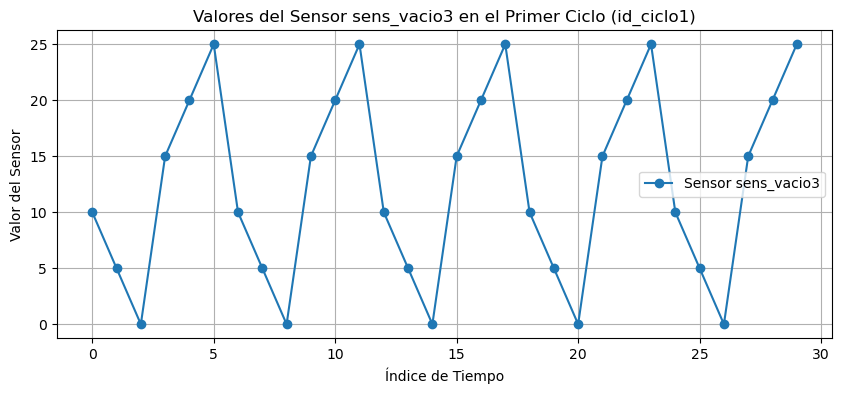

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya tienes los DataFrames cargados: df_cumplen_filtrado y df_medias_vacio

# Obtener el primer ciclo
primer_ciclo = df_cumplen_filtrado["id_ciclo"].unique()[0]

# Filtrar datos del primer ciclo (primeras 30 filas)
df_primer_ciclo = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == primer_ciclo].head(30)

# Obtener los sensores con media > 10 en este ciclo
medias_primer_ciclo = df_medias_vacio[df_medias_vacio["id_ciclo"] == primer_ciclo]
sensores_seleccionados = medias_primer_ciclo[medias_primer_ciclo["media"] > 10]["sensor"].tolist()

# Graficar cada sensor en una figura separada
for sensor in sensores_seleccionados:
    plt.figure(figsize=(10, 4))
    plt.plot(df_primer_ciclo[sensor].values, marker='o', linestyle='-', label=f"Sensor {sensor}")
    plt.title(f"Valores del Sensor {sensor} en el Primer Ciclo ({primer_ciclo})")
    plt.xlabel("Índice de Tiempo")
    plt.ylabel("Valor del Sensor")
    plt.legend()
    plt.grid(True)
    plt.show()


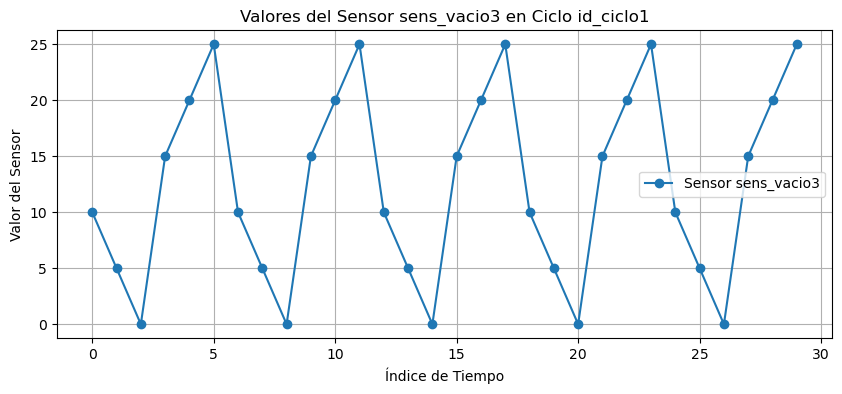

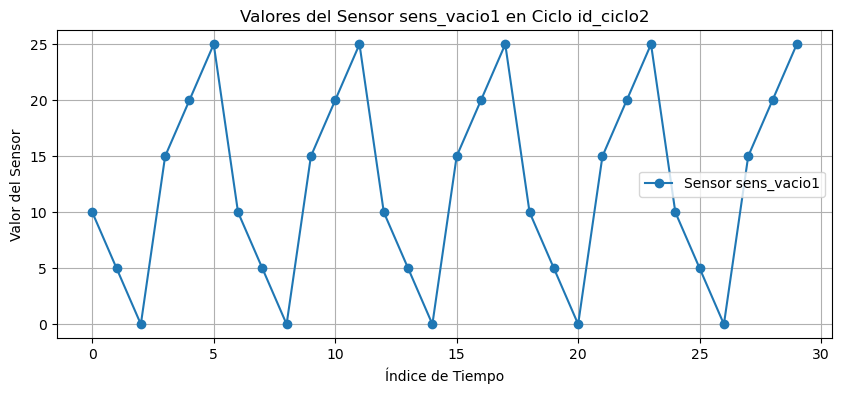

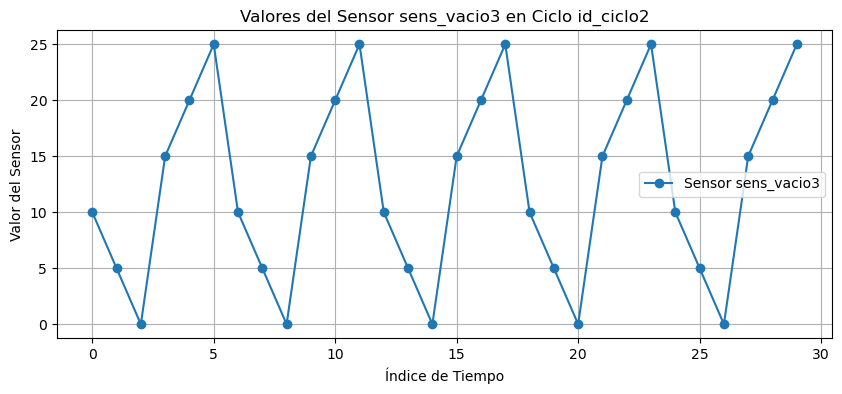

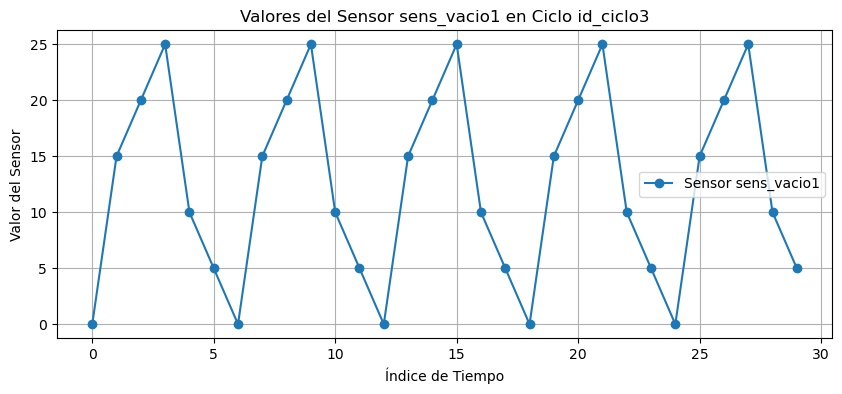

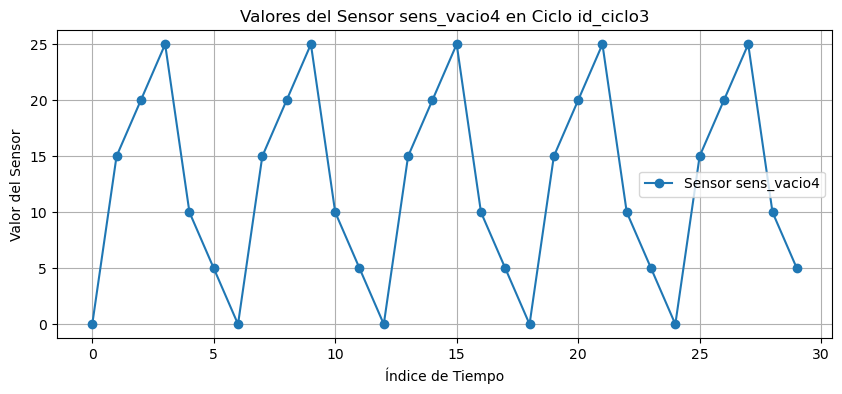

In [24]:
import matplotlib.pyplot as plt

# Iterar sobre cada ciclo en df_cumplen_filtrado
for ciclo in df_cumplen_filtrado["id_ciclo"].unique():
    # Filtrar datos del ciclo actual (primeras 30 filas)
    df_ciclo_actual = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == ciclo].head(30)

    # Obtener los sensores con media > 10 en este ciclo
    medias_ciclo_actual = df_medias_vacio[df_medias_vacio["id_ciclo"] == ciclo]
    sensores_seleccionados = medias_ciclo_actual[medias_ciclo_actual["media"] > 10]["sensor"].tolist()

    # Graficar cada sensor en una figura separada
    for sensor in sensores_seleccionados:
        plt.figure(figsize=(10, 4))
        plt.plot(df_ciclo_actual[sensor].values, marker='o', linestyle='-', label=f"Sensor {sensor}")
        plt.title(f"Valores del Sensor {sensor} en Ciclo {ciclo}")
        plt.xlabel("Índice de Tiempo")
        plt.ylabel("Valor del Sensor")
        plt.legend()
        plt.grid(True)
        plt.show()


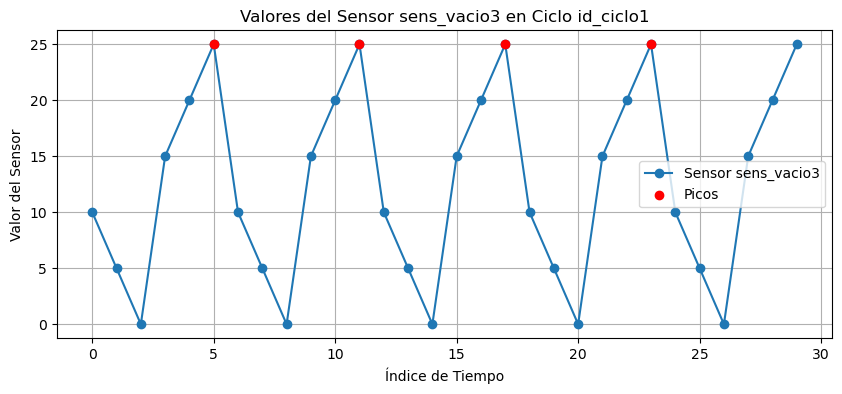

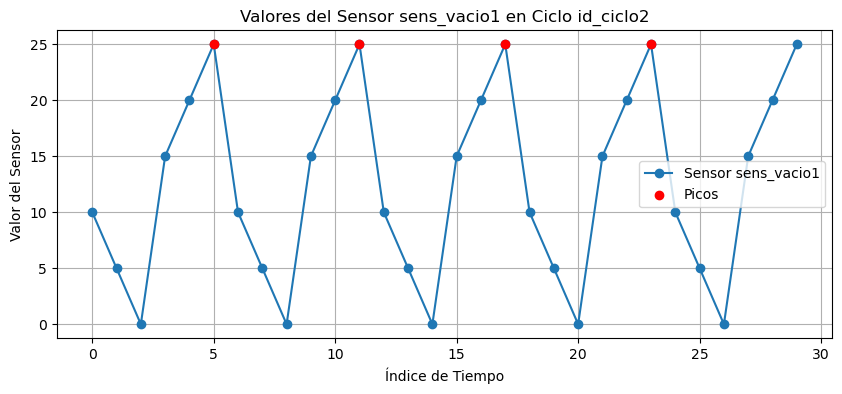

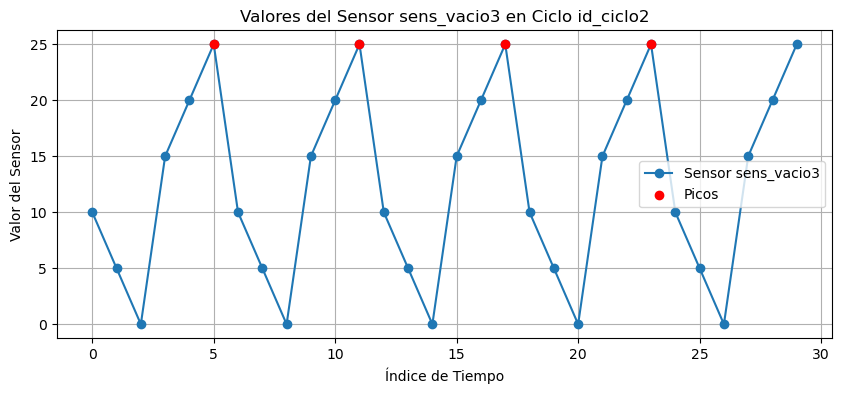

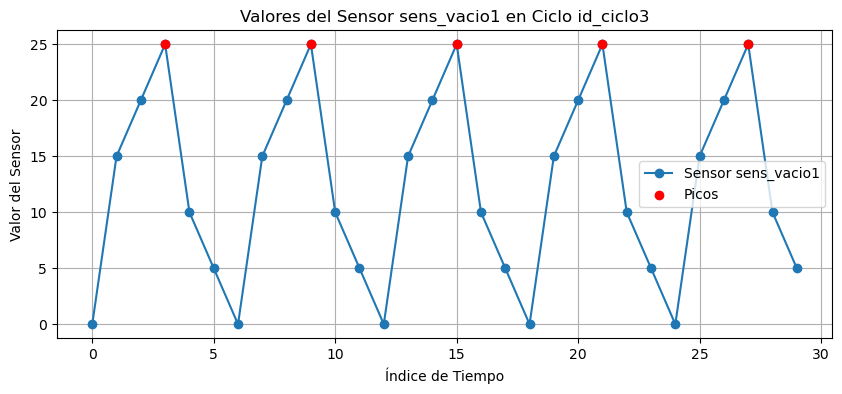

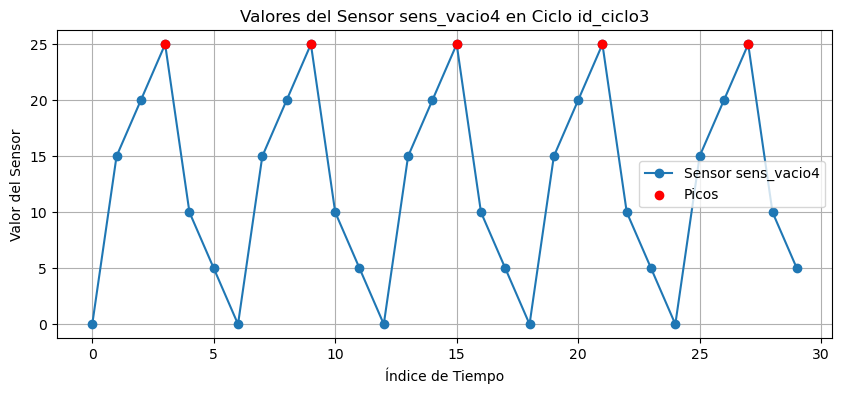

In [25]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import pandas as pd

# Crear una lista para almacenar los picos detectados para todos los ciclos
lista_picos_detectados = []

# Iterar sobre cada id_ciclo en df_cumplen_filtrado
for ciclo in df_cumplen_filtrado["id_ciclo"].unique():
    # Filtrar datos del ciclo actual
    df_ciclo_actual = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == ciclo]
    
    # Limitar el análisis a las primeras 30 filas del ciclo actual
    df_ciclo_actual = df_ciclo_actual.head(30)
    
    # Obtener los sensores con media > 10 en este ciclo
    medias_ciclo_actual = df_medias_vacio[df_medias_vacio["id_ciclo"] == ciclo]
    sensores_seleccionados = medias_ciclo_actual[medias_ciclo_actual["media"] > 10]["sensor"].tolist()

    # Evaluar los picos en los sensores seleccionados
    for sensor in sensores_seleccionados:
        valores_sensor = df_ciclo_actual[sensor].values  # Obtener los valores del sensor

        # Buscar picos con las propiedades definidas
        picos, propiedades = find_peaks(valores_sensor, height=3.5, prominence=6, distance=2)

        # Recorrer los picos detectados y almacenarlos
        for pico in picos:
            lista_picos_detectados.append({"id_ciclo": ciclo, "sensor": sensor, "pico": valores_sensor[pico], "indice": pico})

# Convertir la lista de picos en un DataFrame para todos los ciclos
df_picos_detectados = pd.DataFrame(lista_picos_detectados)

# Graficar los valores de los sensores con los picos resaltados
for ciclo in df_cumplen_filtrado["id_ciclo"].unique():
    # Filtrar datos del ciclo actual
    df_ciclo_actual = df_cumplen_filtrado[df_cumplen_filtrado["id_ciclo"] == ciclo]
    df_ciclo_actual = df_ciclo_actual.head(30)  # Limitar a las primeras 30 filas
    
    # Obtener los sensores con media > 10 en este ciclo
    medias_ciclo_actual = df_medias_vacio[df_medias_vacio["id_ciclo"] == ciclo]
    sensores_seleccionados = medias_ciclo_actual[medias_ciclo_actual["media"] > 10]["sensor"].tolist()

    # Filtrar los picos detectados para este ciclo
    df_picos_ciclo = df_picos_detectados[df_picos_detectados["id_ciclo"] == ciclo]

    # Graficar cada sensor en una figura separada con los picos resaltados
    for sensor in sensores_seleccionados:
        plt.figure(figsize=(10, 4))
        valores_sensor = df_ciclo_actual[sensor].values

        # Plot de los valores del sensor
        plt.plot(valores_sensor, marker='o', linestyle='-', label=f"Sensor {sensor}")

        # Obtener los índices y valores de los picos detectados
        picos_sensor = df_picos_ciclo[df_picos_ciclo["sensor"] == sensor]
        if not picos_sensor.empty:
            indices_picos = picos_sensor["indice"].values  # Índices de los picos
            valores_picos = picos_sensor["pico"].values  # Valores de los picos
            plt.scatter(indices_picos, valores_picos, color='red', label="Picos", zorder=3)

        # Configuración del gráfico
        plt.title(f"Valores del Sensor {sensor} en Ciclo {ciclo}")
        plt.xlabel("Índice de Tiempo")
        plt.ylabel("Valor del Sensor")
        plt.legend()
        plt.grid(True)
        plt.show()
